In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

##Daten Einlesen


In [80]:
dt = pd.read_csv('Sleep_Efficiency.csv')

In [81]:
dt

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [82]:
dt.tail

<bound method NDFrame.tail of       ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66  

<Axes: >

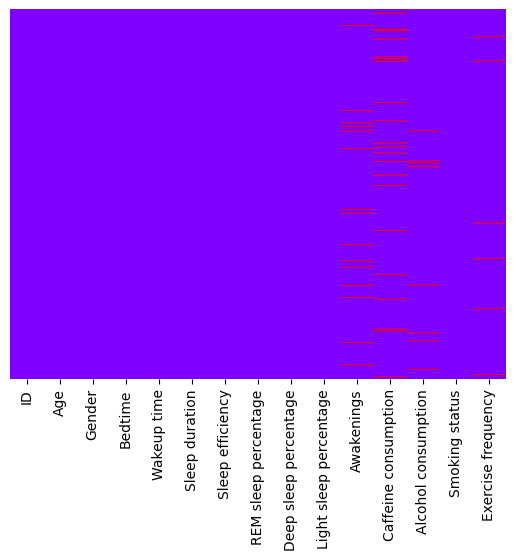

In [83]:
sns.heatmap(dt.isnull(), yticklabels= False, cbar= False, cmap= 'rainbow')

<Axes: >

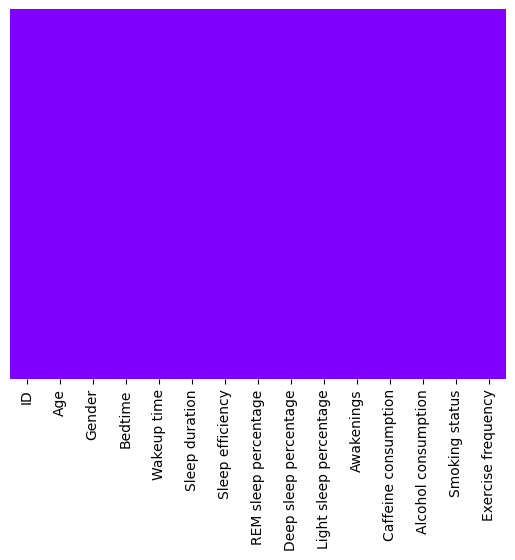

In [84]:
def preprocessing(dt):
    #  Numerische Spalten behandeln
    numeric_columns = ['Age', 'Sleep duration', 'Sleep efficiency', 
                      'REM sleep percentage', 'Deep sleep percentage', 
                      'Light sleep percentage', 'Awakenings',
                      'Caffeine consumption', 'Alcohol consumption',
                      'Exercise frequency']
    
    for col in numeric_columns:
        if col in dt.columns:
            #  Prüfung auf fehlende Werte
            if dt[col].isna().any():
                median_value = dt[col].median()
                dt[col] = dt[col].fillna(median_value)
    
    #  kategorische Spalten behandeln
    categorical_columns = ['Gender', 'Smoking status']
    for col in categorical_columns:
        if col in dt.columns:
            # NEU: Prüfung auf fehlende Werte
            if dt[col].isna().any():
                mode_value = dt[col].mode()[0]
                dt[col] = dt[col].fillna(mode_value)
    
    #  Zeitdaten konvertieren
    if 'Bedtime' in dt.columns:
        dt['Bedtime'] = pd.to_datetime(dt['Bedtime'])
    if 'Wakeup time' in dt.columns:
        dt['Wakeup time'] = pd.to_datetime(dt['Wakeup time'])
    
    return dt

dt = preprocessing(dt)
sns.heatmap(dt.isnull(), yticklabels= False, cbar= False, cmap= 'rainbow')

In [86]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              452 non-null    float64       
 11  Caffeine consumption    452 non-null    float64       
 12  Alcohol consumption     452 non-null    float64   